INFO:root:Initialized Hamiltonian in QuTiP.
INFO:root:Initialized wavefunction to ground state.
INFO:root:Starting evolution...
C:\Users\jonpo\AppData\Local\Programs\Python\Python313\Lib\site-packages\qutip\solver\solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(
INFO:root:Evolution completed.


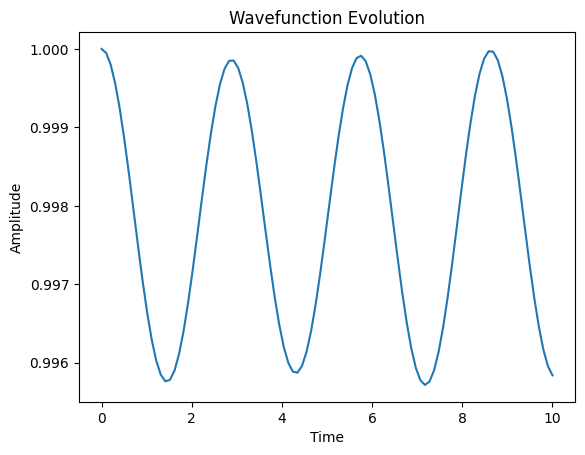

In [1]:
import numpy as np
import logging
from qutip import Qobj, basis, mesolve

# Initialize the logger
logging.basicConfig(level=logging.INFO)

class QuTiPHamiltonianSimulator:
    def __init__(self, num_states):
        self.num_states = num_states
        self.hamiltonian = None
        self.wavefunction = None

    def initialize_hamiltonian(self, diagonal_elements, off_diagonal_strength=0.1):
        """
        Initializes the Hamiltonian with specified diagonal elements and a simple off-diagonal structure.
        """
        H = np.zeros((self.num_states, self.num_states), dtype=np.complex128)
        
        # Set diagonal elements
        np.fill_diagonal(H, diagonal_elements)
        
        # Set off-diagonal elements (coupling)
        for i in range(self.num_states - 1):
            H[i, i + 1] = off_diagonal_strength
            H[i + 1, i] = off_diagonal_strength
        
        self.hamiltonian = Qobj(H)
        logging.info("Initialized Hamiltonian in QuTiP.")

    def initialize_wavefunction(self):
        """
        Initializes the wavefunction to the ground state (basis vector 0).
        """
        self.wavefunction = basis(self.num_states, 0)
        logging.info("Initialized wavefunction to ground state.")

    def evolve(self, t_list):
        """
        Evolves the system under the Hamiltonian for specified time points.
        """
        if self.hamiltonian is None or self.wavefunction is None:
            raise ValueError("Hamiltonian or wavefunction not initialized.")

        logging.info("Starting evolution...")
        result = mesolve(self.hamiltonian, self.wavefunction, t_list, [], [])
        logging.info("Evolution completed.")
        return result

def main():
    num_states = 1024  # Number of states in the Hamiltonian
    diagonal_elements = -20.0 * np.random.rand(num_states)  # Random diagonal values

    # Create the simulator
    simulator = QuTiPHamiltonianSimulator(num_states)

    # Initialize the Hamiltonian and wavefunction
    simulator.initialize_hamiltonian(diagonal_elements)
    simulator.initialize_wavefunction()

    # Time evolution
    t_list = np.linspace(0, 10, 100)  # Time points for evolution
    result = simulator.evolve(t_list)

    # Plot or analyze results
    import matplotlib.pyplot as plt
    plt.plot(t_list, [abs(state.full()[0, 0]) for state in result.states])
    plt.title("Wavefunction Evolution")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.show()

if __name__ == "__main__":
    main()
